In [56]:
%matplotlib inline
from pandas import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import seaborn as sns

In [13]:
db = pd.read_pickle('16-17-nba_player_stats.pkl')
db_num = db.select_dtypes(include=[np.number])
db_norm = (db_num - db_num.mean()) / db_num.std()

In [17]:
db[db_norm.columns] = db_norm
db.to_pickle('16-17-nba_player_stats_normed.pkl')

In [26]:
player_names = db['player'].tolist()
player_stats = np.array(db_norm.as_matrix())

In [71]:
clustered = KMeans(n_clusters=5, tol=0.0000001).fit(player_stats)

In [72]:
print clustered

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=1e-07, verbose=0)


In [73]:
clustered.labels_

array([0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 2, 0, 2, 4, 2, 4, 4,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 4, 2, 4, 4, 2, 1, 1, 1, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 1, 4,
       2, 2, 4, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 2, 4, 1, 3, 2, 1, 1, 4, 3, 2, 2, 3, 1, 3, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 1, 2, 2, 3, 1, 1, 1, 3, 2, 3, 1, 2, 2, 3, 1, 2, 2, 3, 3,
       3, 1, 1, 3, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 1, 3,
       3, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3], dtype=int32)

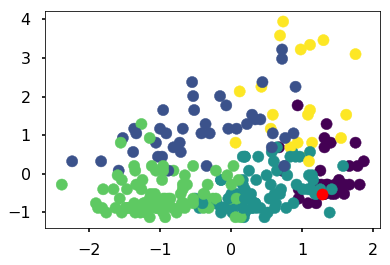

In [74]:
sns.set_context('poster')
plt.scatter(player_stats[:,1], player_stats[:,12], c=clustered.labels_), #cmap=ListedColormap(clustered.labels_))
plt.scatter(player_stats[2][1], player_stats[2][12], c='Red')